In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(10,5)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

<Figure size 1000x500 with 0 Axes>

# Kurvenanpassung

Bei der Kurvenanpassung handelt es sich um ein statistisches Analyseverfahren zur Feststellung funktionaler Beziehungen zwischen einer abhängigen und einer oder mehreren unabhängigen Variablen. Der Begriff **lineare Regression** ist weit verbreitet, doch dies ist nur der einfachste Fall eines Modells, nämlich der einer Geraden: $y = a \cdot x +b$. Grundsätzlich sollte man den Typ der Fit-Funktion $y = f(x)$ immer vorher festlegen und auch begründen können. Es ist keine wissenschaftlicher oder messtechnische Vorgehensweise alle möglichen Funktionen nur auf Verdacht *auszuprobieren* und sich für die besten entscheiden. Hierbei wäre es möglich, dass unbrauchbare Näherungen pder sogar falsche (unsinnige) und nicht-wissenschaftlicher Ergebnisinterpretationen auftreten könnten, was es zu vermeiden gilt. 

Zusammengefasst suchen wir nun also ein bestimmtes Modell für ein bestimmtes Set an Daten und wollen die Modellparameter bestimmen. Dabei soll das Modell möglichst gut die Messdaten vorhersagen. Die Modellanpassung wird häufig über die Methode der kleinsten Quadrate verwendet, mit welcher sich fast alle Messdaten modellieren lassen (auch kompliziertere Situationen wie beispielsweise korrelierte Unsicherheiten). 

Hinweis zur Begrifflichkeit:

* **Regression**: Untersuchung der *Korrelation* von Datenpunkten ohne Messfehler mit angenommenen Zusammenhang
* **Fit/Anpassung**: wie die Regression, allerdings unter Berücksichtigung von Messfehlern. 
* **Interpolation**: Hierbei handelt es sich nicht um eine Regression bzw. Approximation. Anstelle eines funktionalen Zusammenhangs, der an die Messwerte angenähert wird, verwendert man Polynome hohen Grades, um eine analytische Kennlinie zu beschreiben, die *exakt* durch alle Messpunkte geht. Für eine große Anzahl von Messwerten wird die Interpolationsfunktion sehr schnell unhandlich. 

![Bild](pictures/interpol_approx.png)

## Modellanpassung <a id="Sec-Modellanpassung"></a>

Um ein Regressionsmodell zu berechnen, benötigen wir ein objektives Maß um die Zuverlässigkeit und Güte unsere Modellfunktion zu bestimmen. Dies nennt man auch das **Bestimmtsheitsmaß**, bzwl. auf englisch **coefficient of determination** oder **goodness of fit**. Dieses Maß 
* bestimmt die Verkleinerung des Vorhersagefehlers der Ausgangsgröße $y$
* definiert die Größe der Streuung von $y$
* zeigt die Qualität der linearen Regression, aber nicht ob das Modell richtig ist
* sagt nichts über die statistische Signifikanz des ermittelten Zusammenhangs der einzelnen Regressoren aus (Signifikanztest notwendig)

Als erstes soll überprüft werden, inwiefern die Funktion oder das Modell mit den Messdaten übereinstimmt. Ausgangspunkt ist also unsere Messreihe mit $N$ Messpunkten $(x_i, y_i)$ und wir haben eine Funktion $f(x_i)$ definiert, die die Messwerte $y_i$ möglichst gut vorhersagen soll. In der unteren Grafik (geborgt von [Wikipedia](https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate)), sind Messpunkte in blau und eine Modellfunktion in rot aufgezeichnet. Die Parameter der gesuchten Modellfunktion werden nun so bestimmt, dass die Modellfunktion möglichst wenig von den Messwerten abweicht, d.h. das Residuum 

$$\epsilon = \left( f(x_i) - y_i\right)$$

soll möglichst klein werden. 

![Bild](pictures/kleinste_quadrate.png)

### Least-Squares: Methode der kleinsten Quadrate <a id="SubSec-least_squares"></a>

Laut Carl Friedrich Gauß kann also der Abstand der Funktionswerte zu den Messwerten wievolgt definiert werden:

> Methode der Gauß'schen Fehlerquadrate (Gütefunktion): 
$$Q := \sum_{i=1}^N \left( f(x_i) - y_i\right)^2 :=  \sum_{i=1}^N \epsilon_i^2 = \mathrm{min!}$$

Die Gütefunktion, die gleichbedeutend mit den SQT ist, ist wieder so gewählt, dass sich Abweichungen aufgrund unterschiedliche Vorzeichen nicht aufheben können und dass größere Abweichungen stärker gewichtet werden (durch die Quadrierung). Die Modellfunktion $f(x)$ wird bestimmt, indem das Minimierungsproblem gelöst wird. Dies kann entwedet analytisch geschehen (siehe [Lineare Modellanpassung](#SubSec-Lineare_Modellanpassung)) oder man lässt sich die Regression mittels Software berechnen. 

Es handelt sich um ein *Minimierungsproblem* welches je nach Art der Modellfunktion unterschiedlich gelöst wird. Man sollte stets die Regressionsgerade zusammen mit den Datenpunkten in ein Diagramm zeichnen, um zu sehen, wie "gut" die Messdaten durch die Kurvenanpassung beschrieben werden. 
Je enger die Datenpunkte um die Regressionsgerade herum konzentriert sind, d. h. je kleiner also die Residuenquadrate sind, desto „besser“. Die Residuenquadrate sind meistens relativ klein, insbesondere dann, wenn die abhängige Variable sehr konstant ist. Das heißt man möchte eigentlich auch die Streuung der abhängigen Variablen mit ins Spiel bringen.
Sowohl die Streuung der Messwerte zum Mittelwert, als auch die der geschätzten Werte, sollte in Relation zueinander gebracht werden. Das heißt wir definieren im Folgenden zwei Summen der Abweichungsquadrate. Die **Summe der Abweichungsquadrate (Sum of Squares) SQT oder SST** gibt die Streuung der Messwerte um ihren Mittelwert an. Das *mittlere* Abweichungsquadrat bestimmt deren Varianz. 

* Die **Summe der Quadrate der Erklärten Abweichungen (Sum of Squares Explained) SQE oder SSE** gibt die Streuung der Schätzwerte $f(x_i)$ des Fits um den Mittelwert $\bar f = \bar y$ der gemessenen Messwerte an:

$$\mathrm{SQE} = \mathrm{SSE} = \sum_{i=1}^N (f(x_i) - \bar y)^2$$

* Die **totale Quadratsumme (Summe der Quadrate der Totalen Abweichungen bzw. Sum of Squares Total) SQT oder SST** gibt die Streuung der Messwerte $y_i$ um deren Mittelwert $\bar y$ an:

$$\mathrm{SQT} = \mathrm{SST} = \sum_{i=1}^N (y_i - \bar y)^2$$

* Die **Restabweichungen** (nicht erklärte Abweichungen), welche nach der Regression übrig bleiben sind ein Maß für die Abweichung der Datenpunkte von der Regressionskurve und werden durch die Residuenquadratsumme (**Summe der Quadrate der Restabweichungen** (oder: „Residuen“) bzw. englisch Sum of Squares Residual) SQR oder SSR) erfasst:

$$\mathrm{SQR} = \mathrm{SSR} = \sum_{i=1}^N(y_i-f(x_i))^2$$

* Man kann beweisen, dass folgendes gilt:

$$\mathrm{SQT} = \mathrm{SQR} + \mathrm{SQE}$$

### Bestimmtheitsmaß <a id="SubSec-Bestimmtheitsmaß"></a>

Für das **Bestimmtheitsmaß** gelten folgenden Punkte:
* Es beschreibt den Anteil der Varianz einer abhängigen Variablen $y$ durch ein statistisches Modell
* Es ist nur für lineare Regressionen eindeutig definiert:
$$\mathit{R}^2 = r^2 (=\textrm{Korrelation}^2)$$
* Es kann bedingt zur Beschreibung der Güte einer Regression verwendet werden. 

* Das Verhältnis der beiden Größen SQE und SQT wird das **Bestimmtheitsmaß** der Regression genannt und gibt an, wie gut die gefundene geschätzte Modellfunktion zu den Messdaten passt, oder wie gut sich die Regression an die Daten annähert. 

$$\mathit{R}^2 \equiv \frac{SQE}{SQT}=
\frac{\displaystyle\sum_{i=1}^N \left(f(x_i)- \overline{y}\right)^2}{\displaystyle\sum_{i=1}^N \left(y_i - \overline{y}\right)^2} = 1 - \frac{SQR}{SQT}=1-\frac{\displaystyle\sum_{i=1}^N \left(y_i - f(x_i)\right)^2}{\displaystyle\sum_{i=1}^N \left(y_i - \overline{y}\right)^2}$$

wobei:
* $f(x_i)$ der Funktionswert der Regression ist
* $x_i$ der Datenwert ist
* und $\bar y$ der Mittelwert $y_i$ der Messwerte ist

Das Bestimmtheitsmaß lässt sich mit 100 multiplizieren, um es in Prozent anzugeben, dies entspricht dann dem prozentualen Anteil der Streuung in $y$, der durch das lineare Modell beschrieben wird und liegt somit zwischen 0% und 100%:
* 0%: es existiert kein linearer Zusammenhang
* 100%: perfekter linearer Zusammenhang

Allgemein gilt für das Bestimmheitsmaß:
* je näher $\mathit{R}^2$ an 1 liegt, desto höher ist die Güte der Kurvenanpassung
* für $\mathit{R}^2=0$ ist der Schätzer im Modell völlig unbrauchbar für irgendeine Vorhersage eines Zusammenhangs zwischen $x_i$ und $y_i$. 
* für $\mathit{R}^2=1$ lässt sich $y$ vollständig durch ein lineares Modell beschreiben und alle Messpunkte liegen auf einer nicht-horizontalen Geraden. In diesem Falle würde man davon sprechen, dass ein deterministischer Zusammenhang besteht, kein stochastischer. 

**Nachteile des Bestimmheitsmaß:**
Für immer mehr Messwerte steigt $\mathit{R}^2$ an, ohne dass die Korrelation oder die Regression besser wird.
Dies könnte durch ein korrigiertes $\mathit{R}^2$ behoben werden:
    
$$\mathit{\overline R}^2 = 1-(1-\mathit{R}^2)\cdot \frac{n-1}{n-p-1}$$

mit 
* $n$ Anzahl der Messwerte und
* $p$ Anzahl der Variablen im Regressionsmodell

Ein weiterer Nachteil ist, dass keine Aussage darüber geliefert werden kann, ob ein *korrektes* Regressionsmodell verwendet wurde.

### Modellanpassung mit Unsicherheiten <a id="SubSec-Modellanpassung_unsicherheiten"></a>

Im allgemeinen Fall, d.h. wenn die Messwerte $y_i$ mit Unsicherheiten $s_i$ behaftet sind, lässt sich die Residuensumme wiefolgt definieren:

$$\chi^2 = \sum_{i=1}^N \left(\frac{f(x_i)-y_i}{s_i}\right)^2$$

Für die obigen Berechnungen, und auch im Falle von konstanten Unsicherheiten, d.h. wenn für alle Werte von $y_i$ die gleiche absolute Unsicherheit existiert, ändert sich nichts. Denn es gilt $s_i = s = \mathrm{const}$ und beim "Nullsetzen" werden diese einfach eliminiert.
Gelten für die $N$ Messwerte allerdings unterschiedliche Unsicherheiten, so müssen diese miteinbezogen werden. 

### Lineare Modellanpassung <a id="SubSec-Lineare_Modellanpassung"></a>

Da wir als Messtechniker immer danach streben möglichst lineare Kennlinien zu erreichen, ist die Gerade eine häufig auftretende Kurve, die angepasst werden soll. Daher wollen wir uns in diesem Abschnitt mit der Herleitung der linearen Regression befassen. Die Herleitung für andere Modellfunktionen, welche quadratische Terme, noch höhere Terme oder ganz andere Zusammenhänge beinhalten, ist auch deutlich schwieriger.

Unser Ausgangspunkt ist also eine Gerade der Form 

$$f(x) = mx + b$$

Die Parameter $m$ und $b$ werden nun durch das Minimierungsproblem bestimmt mithilfe der Gütefunktion, die nun wiefolgt geschrieben werden kann:

$$Q = \sum_{i = 1}^{N} (y_i - f(x_i))^2 = \sum_{i = 1}^{N} (y_i - mx_i - b)^2 = \mathrm{min!}$$

wobei $y_i$ und $x_i$ die Messwerte (Datenpunkte) sind. 

Durch Differentation nach den Parametern und gleichsetzen auf Null können die Parameter bestimmt werden:

$$\frac{dQ}{dm} = -2 \sum_{i = 1}^{N} x_i (y_i - mx_i - b) = 0$$

$$\frac{dQ}{db} = -2 \sum_{i = 1}^{N} (y_i - mx_i - b) = 0$$

Nach Umstellen der beiden Ableitungen gelangt man zu folgenden Gleichungssystem:

$$m\sum_{i = 1}^{N} x_i^2 + b\sum_{i = 1}^{N}x_i  = \sum_{i = 1}^{N}x_i y_i$$

$$m\sum_{i = 1}^{N} x_i + N b  = \sum_{i = 1}^{N} y_i$$

Auflösen nach den gesuchten Parameter erhält man folgende Gleichungen für die gesuchten besten Schätzparamete der Regressionsgeraden, auch **Regressionskoeffizienten** genannt:

$$ m = \frac{\sum_{i=1}^N (x_i y_i) - b\sum_{i=1}^N x_i }{\sum_{i=1}^N x_i^2 } = \frac{S_{xy}}{S_{x}^2} = \frac{\overline{x\cdot y} - \overline x \cdot \overline y}{\overline{x^2} - (\overline x)^2}$$

$$b = \frac{\sum_{i=1}^N y_i - m \sum_{i=1}^N x_i}{N} = \bar y - m \cdot \bar x$$

mit folgenden Definitionen:

> $\bar x = \sum_{i = 1}^N x_i$

> $\bar y = \sum_{i = 1}^N y_i$

> $S_{xy} = \frac{1}{N-1}\sum_{i = 1}^N (x_i-\bar x)(y_i - \bar y)$

> $S_{x}^2 = \frac{1}{N-1}\sum_{i = 1}^N (x_i-\bar x)^2$

Wir sind hier in der verrückten Situation, dass tatsächlich  Mittelwerte für $x$ und $y$ bestimmt werden müssen, obwohl die $x$-Werte absichtlich während der Versuchsreihe verändert werden, sich also die Grössen $x$ und $y$ laufend ändern.

![Bild](pictures/lin_reg.png)

Nun sind die Schätzwerte allerdings zusätzlich fehlerbehaftet (wie sollte es auch anders sein). Mithilfe der Gleichung der Größtfehlers/Maximalfehlers kann man zeigen (den Beweis überspringen wir hier), dass für den Fehler von $y$ folgendes gilt:

$$s_y = \sqrt{\frac{1}{N-2}\sum(y_i - mx_i - b)^2 }$$

Die ist auch die Standardabweichung der Einzelmessung aber *nicht* der Fehlerbalken, der im Diagramm als Fehlerbalken eingezeichnet wird. Die Abweichung der Einzelmessung wurde bisher mit $N-1$ definiert, damals hat es sich aber um die Abweichung vom *Mittelwert* gehandelt. Nun betrachten wir die Abweichung zu einem linearen Modell, welches 2 offene Parameter, $m$ und $b$, hat, und somit einen Freiheitsgrad mehr bestitzt. Erst ab 3 Messwertepaaren können also Fehler für Steigung und Achsenabschnitt berechnet werden.
Die besten Schätzwerte für die Abweichungen von $m$ und $b$ können nun wiefolgt berechnet werden. Der Fehler der Geradensteigung beträgt:

$$s_m = s_y \cdot \sqrt{\frac{N}{N\cdot \sum x_i^2 - \left(\sum x_i\right)^2}} = s_y \cdot \sqrt{\frac{1}{\sum x_i^2 - N\cdot \bar x^2}} = s_y \cdot \sqrt{\frac{1}{\sum \left(x_i - \bar x \right)^2}} = s_y \cdot \sqrt{\frac{1}{N\cdot (\overline{x^2} - (\overline x)^2)}}$$

Der Fehler des Ordinatenabschnitts beträgt:

$$s_b = s_y \cdot \sqrt{\frac{\sum x_i^2}{N\cdot \sum x_i^2 - \left(\sum x_i\right)^2}} = s_y \cdot \sqrt{\frac{1}{N}\frac{\sum x_i^2}{\sum x_i^2 - N\cdot \bar x^2}} = s_y \cdot \sqrt{\frac{1}{N}\frac{\sum x_i^2}{\sum \left(x_i - \bar x \right)^2}} = s_m \cdot \sqrt{\overline{x^2}}$$

## Beispiel: Karussel <a id="Sec-Beispiel"></a>

Wir stellen uns im Folgenden ein Kinderkarussel vor und wir wollen die Geschwindigkeit der Feuerwehrautos ermitteln. Das Auto selbst verfügt über kein Tachometer - es bleibt also eigentlich nur die Möglichkeit, die Zeit eines Umlaufs zu stoppen und aus der Geometrie des Karussells den zurückgelegten Weg zu bestimmen. Daraus lässt sich die Geschwindigkeit leicht berechnen.
Wie aber könnte eine Fehlerrechnung aussehen? Wie lässt sich eine Mehrfachmessung anstellen?

Beispielsweise könnte man die Zeit nach jedem Umlauf messen, die näherungsweise konstant sein sollte (bis auf die 1. Runde, wo noch beschleunigt wird). Es könnte sich also ein linearer Zusammenhang zwischen zurückgelegtem Weg und der benötigten Zeit vermuten:

$$y = m\cdot x + b \Rightarrow y - b - m\cdot x = 0$$

Die Konstanten $m$ und $b$ lassen sich nun bestimmen, indem *mindestens* zwei Messungen von $x$ und $y$ vorgenommen werden. Die Messungen dieser Größen werden fehlerbehaftet sein, sodass es zu einer Verfälschung der Konstanten kommt. Durch mehrere Messungen (>2!) von $x$ und $y$ kann der zufällige Fehler auf die Konstanten vermindert und abgeschätzt werden. Zur Vereinfachung nehmen wir allerdings an, dass $x$ fehlerfrei (oder zumindest fehlerarm) ist. Für verschiedene Werte von $x$ ergeben sich dann entsprechende $y$-Werte mit Unsicherheiten. 

Für unser Kinderkarussel bleibt der Messpunkt der Strecke, $x$, laut Annahme unverändert. Dieser ist also sehr genau. Eine Unsicherheit wird bei der Zeitmessung, $y = t$ auftreten. Folgende Messwerte wurden ermittelt:

* Weg  $x$ (m): 12, 24, 36, 42, 60, 72, 84, 96, 108, 120
* Zeit $t$ (s): 12.2, 17, 22.1, 33.2, 34.4, 59.1, 60.2, 65.7, 69.9, 70.1

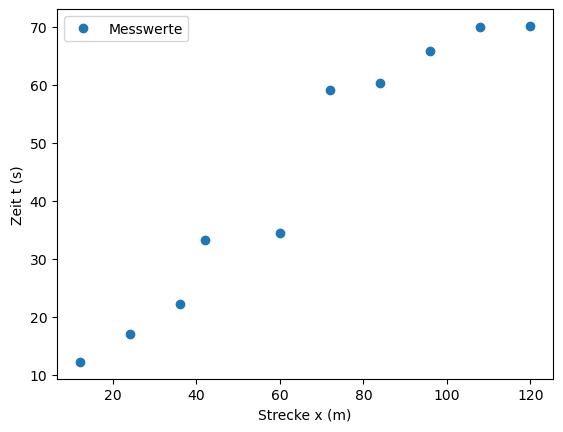

In [2]:
x = [12, 24, 36, 42, 60, 72, 84, 96, 108, 120] # Messwerte der Strecke x in m
t = [12.2, 17, 22.1, 33.2, 34.4, 59.1, 60.2, 65.7, 69.9, 70.1] # Messwerte der Zeit t in sek.
x = np.array(x) #konvertiere die Messwerte in ein Numpy-Array
t = np.array(t) #konvertiere die Messwerte in ein Numpy-Array

plt.plot(x,t, 'o', label = 'Messwerte')
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

### Analytische Lineare Regression <a id="SubSec-Analytical_LinReg"></a>

An dem Diagram erkennt man, dass die Parameter $m$ und $b$ niemals fehlerrfrei berechnet werden können. Die gemessenen Punkte werden immer neben der Geraden liegen. Das heißt eine fehlerfreie Berechnung der Parameter aus den Messwerten wird daher nicht möglich sein. Daher können wir wieder nur versuchen beste Schätzungen für $m$ und $b$ zu definieren, die bei einer steigenden Anzahl von Messwerten den *wahren* Werten beliebig nahe kommt. Diese Schätzwerte sind die Regressionskoeffizienten, welche wir bereits eben definiert hatten und wiefolgt berechnen können:

$$ m = \frac{S_{xt}}{S_{x}^2} = \frac{\overline{x\cdot t} - \overline x \cdot \overline t}{\overline{x^2} - (\overline x)^2}$$

$$b = \frac{\sum_{i=1}^N t_i - m \sum_{i=1}^N x_i}{N} = \bar t - m \cdot \bar x$$

Die Steigung ist 		 m = 0.6067 s/m
Der Ordinatenabschnitt ist 	 b = 4.7148 s


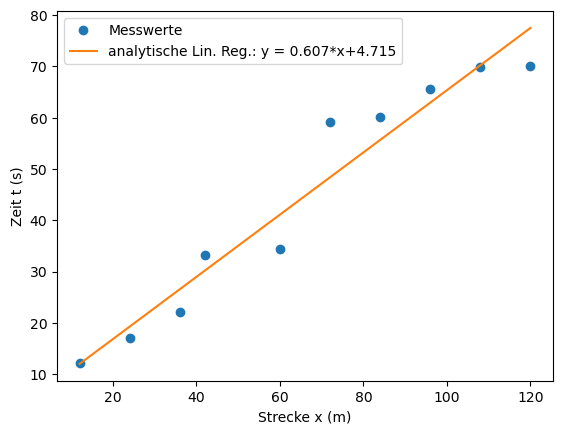

In [3]:
m = (np.mean(x*t) - np.mean(x)*np.mean(t))/(np.mean(x**2) - np.mean(x)**2)
b = np.mean(t) - m * np.mean(x)
print('Die Steigung ist \t\t m = %5.4f s/m' %(m))
print('Der Ordinatenabschnitt ist \t b = %5.4f s' %(b))

plt.plot(x,t, 'o', label = 'Messwerte') # plot Messwerte
plt.plot(x,m*x+b, label = 'analytische Lin. Reg.: y = %5.3f*x+%5.3f' %(m,b))  # plot Ausgleichsgerade mit m und b
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

### Lineare Regression mit Python: scipy <a id="SubSec-scipy_LinReg"></a>

Mit einem Datenanalyseprogramm, sei es hier in Python oder in Matlab oder Maple, können Hilfsfunktionen und Pakete geladen werden, um Fit-Funktionen automatisch auf Messwerte anzupassen. Dies ist in der Regel schneller und insbesondere auch für andere Zusammenhänge, neben linearen Zusammenhängen, viel einfacher in der Umsetzung. Man sollte jedoch stets das Ergebnis kontrollieren, z.B. anhand von grafischen Darstellungen, und sich die Unsicherheiten genau ansehen. Desweiteren können in der Fitroutine Startparameter angegeben werden, welche den Schätzwerten schon recht nah sein sollten. Das Fitergebnis kann nämlich unter Umständen sehr stark von der Wahl der Startparameter abhängen, gerade wenn es um komplexere Fitfunktionen geht. Im Folgenden wollen wir uns aber noch einmal das Beispiels das Karussels ansehen, um die beiden Methoden miteinander zu vergleichen. 

Als erstes definieren wir uns eine allgemein lineare Fitfunktion und anschließend nutzen wir das scipy-Paket und rufen die Optimierungsfunktion auf, um unsere Messwerte zu modellieren. Die Ausgangsparameter werden in einem weiteren Array abgespeichert, welches einerseits die gesuchten Variablen $m$ und $b$ beinhaltet, andererseits die Kovarianzmatrix enthält. Aus der Wurzel die Diagonalelemente dieser Kovarianzmatrix erhält man die Standardabweichung der bestimmten Variablen. 

In [4]:
def fit_lin(x, b, a): # Fit Funktion für eine Gerade mit Steigung b
    return b*x + a

# Fit der Daten:
fit_out = optimization.curve_fit(fit_lin, x, t)

print('Die scipy-Fitparameter lauten:')
print('Die Steigung ist \t\t m = (%5.4f +- %5.4f) s/m' %(fit_out[0][0], np.sqrt(fit_out[1][0][0])))
print('Der Ordinatenabschnitt ist \t b = (%5.4f +- %5.4f) s' %(fit_out[0][1], np.sqrt(fit_out[1][1][1])))

plt.plot(x,t, 'o', label = 'Messwerte') # plot Messwerte
plt.plot(x,m*x+b, label = 'Lin. Reg.: y = %5.3f*x+%5.3f' %(m,b))  # plot Ausgleichsgerade mit m und b
plt.plot(x,fit_out[0][0]*x+fit_out[0][1], '--',label = 'Fit: y = %5.3f*x+%5.3f' %(fit_out[0][0],fit_out[0][1]))  # plot Fitfunktion mit b und a
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

NameError: name 'optimization' is not defined

Man erkennt, dass die Regressionskoeffizienten der beiden Methoden sehr gut übereinstimmen. Die Unterschiede betragen lediglich:

In [24]:
print('Unterschied in den Steigungen: \t\t  %5.3e' %(m-fit_out[0][0]))
print('Unterschied in den Ordinatenabschnitten: %5.3e' %(b-fit_out[0][1]))

Unterschied in den Steigungen: 		  8.582e-13
Unterschied in den Ordinatenabschnitten: -8.125e-12


### Lineare Regression mit Python: lmfit <a id="SubSec-lmfit_LinReg"></a>

Prinzipiell ist es wundervoll für Python für die Optimierung von Problemenen zu nutzen und das scipy-Paket bietet sehr robuste und einfach Nutzung. Andererseits unterscheidet sich das Verfahen nicht besonders von denjenigen, die wir in C oder Fortran bekommen würden. D.h. es gibt einige Herausforderungen in der praktischen Anwendung, warum scipy nicht die optimale Wahl ist:
* Der Benutzer muss sich die Reihenfolge der Variablen und deren Bedeutung merken. (Was war noch mal fit_out[0][0], die Steigung oder der Ordinatenabschnitt?)
* Wenn ich eine Variable nicht fitten möchte, also ich möchte zum Beispiel die Steigung auf fest Null setzen, so muss ich mir eine neue Funktion ohne diese Variable definieren. Insbesondere für komplexere Funktionen und Zusammenhänge wird dieses Verfahren schnell unübersichtlich. Einfacher wäre es, der Optimierungsfunktion zu sagen, welche Variablen ich in diesem Durchlauf gefittet haben möchte, und welche konstant bleiben sollen.
* Zwischen den verschiedenen Variablen können keine Beziehungen hergestellt werden. Es können lediglich Grenzen angegeben werden, in denen sich die Variablen befinden. 

Der Grund für die eingeschränkte Nutzung hat historische Gründe und basiert hauptsächlich auf Fit-Routinen, die beispielsweise für C oder Fortran entwickelt wurden. Python bietet aber mehr, da es unterschiedlich Objekte und Datenstrukturen bietet, statt nur mit Arrays zu rechnen. Daher möchten wir uns noch einem etwas besser geeignetem Paket widmen, und das eben vorgestellt Beispiel noch einmal durchrechnen. 

Das Paket lmfit definiert und benutzt Parameterobjekte anstelle von einfachen Zahlen als Variablen. Dies hat folgende Vorteile:
* Wir müssen uns endlich keine Reihenfolgen von Variablen mehr merken, wir können ihn ab sofort bedeutungsvolle Namen geben.
* Es müssen keine Arrays mehr für Grenzen eingegeben werden und die Reihenfolge der Grenzen, im Array, die vorher durch die Reihenfolge Variablen bestimmt war, spielt nun auch keine Rolle mehr.
* Wir können einfach Parameter fixieren ohne Zielfunktionen neu definieren zu müssen. 
* Algebraische Beschänkungen der Parameter sind ab sofort möglich.

Eine ausführliche Dokumentation findet man hier: https://lmfit.github.io/lmfit-py/index.html

In [25]:
from lmfit import minimize, Parameters
from lmfit import Model

lmfit hat eine eigene print-Ausgabe:
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
abschnitt     4.715     -inf      inf    3.958     True     None     None
steigung     0.6067     -inf      inf  0.05342     True     None     None

Fit Report:
[[Model]]
    Model(f_lin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 10
    # variables        = 2
    chi-square         = 276.888038
    reduced chi-square = 34.6110047
    Akaike info crit   = 37.2102814
    Bayesian info crit = 37.8154516
[[Variables]]
    steigung:   0.60665381 +/- 0.05342018 (8.81%) (init = 0.7)
    abschnitt:  4.71484116 +/- 3.95814322 (83.95%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(steigung, abschnitt) = -0.883


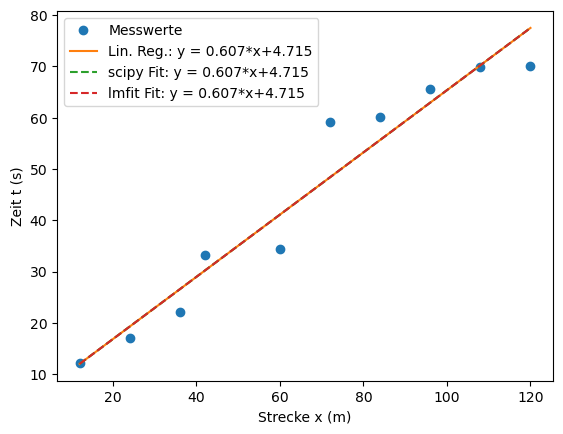

In [26]:
def f_lin(x, steigung, abschnitt):
    return steigung*x + abschnitt

model = Model(f_lin)
params = model.make_params(steigung=0.7, abschnitt=10.0)
result = model.fit(t, params, x=x)

print('lmfit hat eine eigene print-Ausgabe:')
result.params.pretty_print()

print()
print('Fit Report:')
print(result.fit_report())

plt.plot(x,t, 'o', label = 'Messwerte') # plot Messwerte
plt.plot(x,m*x+b, label = 'Lin. Reg.: y = %5.3f*x+%5.3f' %(m,b))  # plot Ausgleichsgerade mit m und b
plt.plot(x,fit_out[0][0]*x+fit_out[0][1], '--',label = 'scipy Fit: y = %5.3f*x+%5.3f' %(fit_out[0][0],fit_out[0][1]))  # plot Fitfunktion mit b und a
plt.plot(x,result.best_fit, '--',label = 'lmfit Fit: y = %5.3f*x+%5.3f' %(result.params['steigung'].value,result.params['abschnitt'].value))  # plot Fitfunktion mit b und a
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

Anhand der ausführlichen Ausgabe erkennt man sofort, wie viele Informationen man aus der Benutzung dieses Paketes ziehen kann, ohne aufwendige Fehlerfortpflanzung betreiben zu müssen. Außerdem kann man Beispielsweise die Fit-Methode ändern (anstelle von least-squares), man kann sich die Anfangs-Fitfunktion ansehen (und parallel zur 'besten' Fit-Funktion anzeigen lassen), man kann Parameter konstant setzen oder sich Standardfehler, $\chi^2$ und Korrelationen (zwischen den Fit-Parametern, nicht den Messwerten!) ausgeben lassen. 

### Bestimmung der Geschwindigkeit <a id="SubSec-geschwindigkeit"></a>

Eigentlich wollten wir ja die Geschwindigkeit der Feuerwehrautos bestimmen.
Der Kehrwert der Steigung $m$ liefert uns die Geschwindigkeit des Karussells, wenn wir den Kehrwert berechnen:

In [27]:
v = 1/m
v_fit = 1/fit_out[0][0]
print('Die Geschwindigkeit ermittelt mittels Analytik ist: v = %5.4f m/s = %5.4f km/h' %(v, v/1000*3600))
print('Die Geschwindigkeit ermittelt mittels Fit ist:      v = %5.4f m/s = %5.4f km/h' %(v_fit, v_fit/1000*3600))

Die Geschwindigkeit ermittelt mittels Analytik ist: v = 1.6484 m/s = 5.9342 km/h
Die Geschwindigkeit ermittelt mittels Fit ist:      v = 1.6484 m/s = 5.9342 km/h


### Unsicherheit der Geschwindigkeit <a id="SubSec-u_geschwindigkeit"></a>

Wie bereits oben schon erwähnt, hat die Regressionen eine Abweichung. Daher müssen wir uns jetzt fragen, was der Fehler der Geschwindigkeit ist. Diesen bekommen wir aus der Steigiung $m$. Das heißt wir benötigen zuerst den Fehler von $m$: 

$$s_m = s_t \cdot \sqrt{\frac{1}{N\cdot (\overline{x^2} - (\overline x)^2)}} \quad \textrm{mit} \quad s_t = \sqrt{\frac{1}{N-2}\sum(t_i - mx_i - b)^2 }$$

Der Vollständigkeit halber berechnen wir ebenfalls den Fehler für $b$:

$$s_b  = s_m \cdot \sqrt{\overline{x^2}}$$

In [28]:
N = len(t)
diff_t = 0
for i in range(N):
    diff_t += ( t[i] - m * x[i] - b )**2

streuung_t = 1/(N-2)*diff_t
s_t = np.sqrt(streuung_t)
s_m = s_t * np.sqrt(1 / (N*(np.mean(x**2) - np.mean(x)**2)))
s_b = s_m * np.sqrt(np.mean(x**2))

print('Die Unsicherheit von t ist \t s_t = %5.4f s' %(s_t))
print('Die Unsicherheit von m ist \t s_m = %5.4f s/m' %(s_m))
print('Die Unsicherheit von b ist \t s_b = %5.4f s' %(s_b))

Die Unsicherheit von t ist 	 s_t = 5.8831 s
Die Unsicherheit von m ist 	 s_m = 0.0534 s/m
Die Unsicherheit von b ist 	 s_b = 3.9581 s


Die Fitroutine in Python gibt uns ebenfalls Unsicherheiten in Form von der Kovarianz-Matrix aus. Auf der Diagonale stehen die Varianzen, $s^2$, auf den Nicht-Diagonalelementen stehen die Kovarianzen (Korrelationsterme zwischen $m$ und $b$):

$$\mathrm{cov}(m,b) = 
\begin{pmatrix}
 s_m^2 & s_{mb} \\
 s_{bm} & s_b^2
\end{pmatrix} $$

Die Unsicherheiten für $m$ und $b$ erhalten wir also aus der Wurzel von den Diagonalelementen. 

In [29]:
print('Die Kovarianzmatrix hat die folgende Form: \n', fit_out[1])
print('')
print('Die Unsicherheit von m ist \t s_m = %5.4f s/m' %(np.sqrt(fit_out[1][0][0])))
print('Die Unsicherheit von b ist \t s_b = %5.4f s' %(np.sqrt(fit_out[1][1][1])))

Die Kovarianzmatrix hat die folgende Form: 
 [[ 2.85371544e-03 -1.86632993e-01]
 [-1.86632993e-01  1.56668987e+01]]

Die Unsicherheit von m ist 	 s_m = 0.0534 s/m
Die Unsicherheit von b ist 	 s_b = 3.9581 s


Auch die Unsicherheiten stimmen für beide Methoden perfekt überein.

Nun interessiert uns allerdings der absolute Fehler der geschätzen Geschwindigkeit. Da die Geschwindigkeit der Kehrwert der Steigung ist ($v = \frac{1}{m}$), müssen wir Fehlerfortpflanzung anwenden. Der Fehler wirkt sich wiefolgt auf den Kehrwert aus: 

$$\Delta v = \left|\frac{\partial v}{\partial m}\right|\cdot \Delta m = \left| -\frac{1}{m^2} \right| \cdot s_m = \frac{1}{m^2} \cdot s_m = s_v$$

Da beide Methoden die gleichen Werte für Schätzungen und Unsicherheiten ausgeben, ersparen wir uns ab nun die Berechnung der Geschwindigkeit inkl. Unsicherheit für beide Methoden. Die Fehlerrechnung wird nur noch für die analytische Methode ausgeführt:

In [30]:
s_v = 1/m**2 * s_m
print('Die Unsicherheit von v ist \t s_v = %5.4f m/s' %(s_v))

Die Unsicherheit von v ist 	 s_v = 0.1452 m/s


Das Messergebnis kann also wiefolgt angegeben werden:
    
$$v = (1,6484 \pm 0,1452)\,\mathrm{m/s}$$    

**Ist diese Angabe sinnvoll?** Wenn wir das so konkret fragen, dann vermutlich nicht...
Wenn der Fehler bereits in der ersten Stelle nach dem Komma signifikant bemerkbar den Schätzwert beeinflusst, warum sollte man sich dann die Mühe machen noch weitere Nachkommastellen hinzuschreiben? Also **sinnvoll runden**:

$$v = (1,6 \pm 0,2)\,\mathrm{m/s}$$    

Warum 0,2 und nicht 0,1? **Fehler werden immer aufgerundet!**

Nun könnte noch der relative Fehler $\Delta v/v$ berechnet werden.

In [31]:
print('Die relative Unsicherheit von v ist \t s_v = %5.4f Prozent' %(s_v/v*100))

Die relative Unsicherheit von v ist 	 s_v = 8.8057 Prozent


### Korrelationskoeffizient <a id="SubSec-Korrelationskoeffizient"></a>

Der Korrelationskoeffizient kann wiefolgt berechnet werden:
    
$$r = \frac{\overline{x\cdot t} - \overline x \cdot \overline t}{\sqrt{\overline{x^2} - (\overline x)^2} \cdot {\sqrt{\overline{t^2} - (\overline t)^2}}} $$    

In [32]:
# Analytische Methode:
r = (np.mean(x*t)-np.mean(x)*np.mean(t))/(np.sqrt(np.mean(x**2) - np.mean(x)**2) * np.sqrt(np.mean(t**2) - np.mean(t)**2))
print('Der Korrelationskoeffizient zwischen x und t beträgt: %5.8f\n'%(r))

# Python:
r = np.corrcoef(x, t)
print('Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:')
print(r)

Der Korrelationskoeffizient zwischen x und t beträgt: 0.97035603

Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:
[[1.         0.97035603]
 [0.97035603 1.        ]]


Der Korrelationskoeffizient von $+ 0,97035$ zeigt mit positivem Vorzeichen eine direkte Proportionalität zwischen $x$ und $t$. Die geringfügige Abweichung zu +1 zeigt, dass die Messwerte leicht von dem erwarteten linearen Zusammenhang dennoch abweichen.

## Beispiel mit Fehlerbalken in den y-Messwerten <a id="Sec-Beispiel_Fehlerbalken"></a>

Gegeben sei eine Messreihe von 10 Messwerten mit annäherend konstanten Verhalten. In diesem sollen nun Kurvenanpassungen vorgenommen werden, unter Berücksichtung von Fehlerbalken. Folgende Messdaten inkl. Unsicherheiten wurden aufgenommen. Die Unsicherheit der $x$-Achse vernachlässen wir hier der Einfachheit halber.

Wir werden dieses Beispiel für 3 Fälle durchrechnen:
* 1. Fall: Jeder Messwert hat einen anderen Fehler: $s_y$ hat unterschiedliche Einträge
* 2. Fall: Jeder Messwert hat den gleichen Fehler: $s_y = s_i = 1.0$
* 3. Fall: Die Messwerte haben keinen Fehler: $s_y = s_i = 0.0$

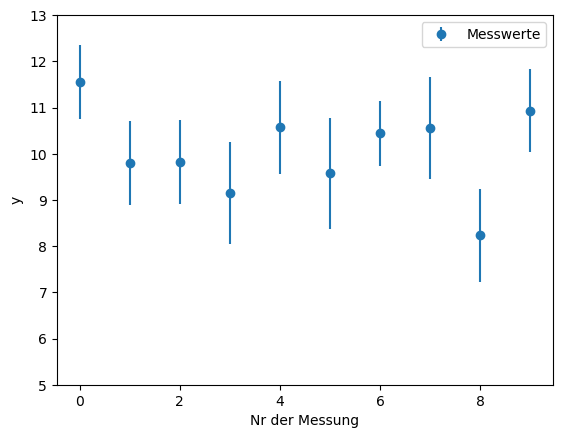

In [33]:
y = [11.55, 9.8, 9.82, 9.15, 10.57, 9.58, 10.44, 10.55, 8.23, 10.93] #Messwerte y_i
s_y = [0.8, 0.9, 0.9, 1.1, 1.0, 1.2, 0.7, 1.1, 1.0, 0.9] #Unsicherheiten Fall 1
x = [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.] #Messwerte y_i

y = np.array(y) #konvertiere die Messwerte in ein Numpy-Array
x = np.array(x) #konvertiere die Messwerte in ein Numpy-Array
s_y = np.array(s_y) #konvertiere die Unsicherheiten in ein Numpy-Array

plt.errorbar(x,y, fmt='o', xerr = None, yerr = s_y, label = 'Messwerte')
plt.xlabel('Nr der Messung')
plt.ylabel('y')
plt.ylim([5,13])
plt.legend()
plt.show()

### Minimierungsproblem lösen: Ausprobieren <a id="SubSec-Ausprobieren"></a>

Im Allgemeinen gilt, je kleiner die Unsicherheit eines Messwertes ist, desto wichtiger ist dieser Messwert für die Mittelwertbildung. Die analytische Lösung würde wiefolgt aussehen:

  -  $S(c) = \displaystyle\sum_{i=1}^{N} \frac{(y_i -c)^2}{{s_i}^2}$
  -  $0= \frac{dS}{dc} = \displaystyle\sum_{i=1}^{N} \frac{2 (y_i -c)}{{s_i}^2}$
  >  $\Rightarrow {\hat c} = \frac{1}{\sum{1/s_i}^2}
     \displaystyle\sum_{i=1}^{N}\frac{1}{{s_i}^2}y_i $  

Mit der Definition $ w_i \equiv \frac{1} {{s_i}^2}$ erhalten wir als wichtiges
Ergebnis die Formel für den *gewichteten Mittelwert*:
>  ${\hat c}= \frac{1} {\sum {w_i}} \displaystyle\sum_{i=1}^{N}  {w_i} y_i$  

Der Mittelwert ist die mit $1/s_i^2$ gewichtete Summe der Einzelmessungen. 
Die Gewichte entsprechen der obigen Erwartung: Messwerte mit den kleinsten $s_i$
bekommen bei der Mittelwertbildung das größte Gewicht. Am Vorfaktor $1/\sum w_i$ kann
man ablesen, dass die Zahl der Messwerte $N$ in diesem Fall durch die Summe der Gewichte
$\sum w_i$ ersetzt werden muss.

Ist der Fehler für alle Messwerte konstant, so kann $s_i$ einfach auf die andere Seite multipliziert werden und verschwindet aus der Gleichung. Ist der Fehler Null, nutzen wir die Gütefunktion, welche minimiert werden muss: 

  -  $Q(c) := \sum_{i=1}^n (y_i - f(x))^2 = \sum_{i=1}^n (y_i - c)^2 = \textrm{min?}$

In [34]:
def S(y,c): # Minimierungsfunktion mit Fehler
    return ((y-c)**2 / s_y).sum()

def Q(y,c): # Minimierungsfehler ohne Fehler
    return ((y-c)**2).sum()

Die Minimierung kann einfach ausgeführt werden, indem die Gütefunktion für verschiedene Funktionsparameter ($c$) ausprobiert wird, im Folgenden werden für $c$ 100 Werte zwischen 8 und 12 ausprobiert:

Minimum unter Einbezug von Unsicherheiten ist bei c = 10.141414141414142
Minimum ohne  Einbezug von Unsicherheiten ist bei c = 10.06060606060606


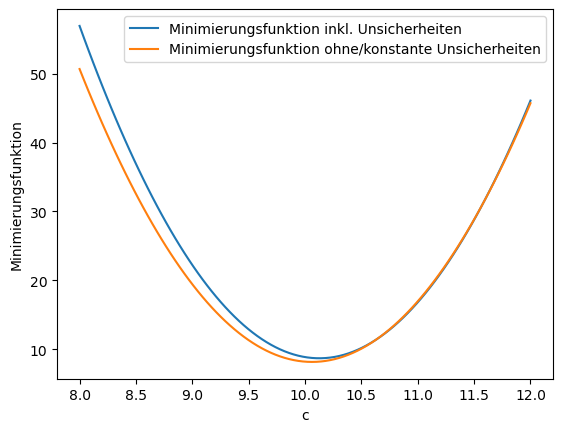

In [35]:
c_val = np.linspace(8,12,100)
S_c = []
Q_c = []

for c in c_val:
    S_c.append(S(y,c))
    Q_c.append(Q(y,c))
    
id_min_S = np.argmin(S_c)
id_min_Q = np.argmin(Q_c)

print("Minimum unter Einbezug von Unsicherheiten ist bei c =", c_val[id_min_S])
print("Minimum ohne  Einbezug von Unsicherheiten ist bei c =", c_val[id_min_Q])

plt.figure()
plt.plot(c_val, S_c, label='Minimierungsfunktion inkl. Unsicherheiten')
plt.plot(c_val, Q_c, label = 'Minimierungsfunktion ohne/konstante Unsicherheiten')
plt.xlabel('c')
plt.ylabel('Minimierungsfunktion')
plt.legend()
plt.show()

Schon bei dieser schnellen Analyse sehen wir, dass es einen Unterschied gibt, ob wir die Fehlerbalken miteinbeziehen, oder ob keine Unsicherheiten vorhanden sind. Sind die absoluten Unsicherheiten für alle Messwerte die gleichen, so trifft der Fall *ohne* Unsicherheiten zu.  

###  Kurvenanpassung mit Python: scipy <a id="SubSec-scipy_bsp2"></a>

Im Folgenden Code-Block wollen wir die Analyse dieser einfachen Messreihe noch einmal mittel scipy-Paket wiederholen und eine lineare Regression und konstante Regression auf die Messdaten anwenden. Wir definieren also zwei Fit-Funktionen:

In [36]:
def fit_lin(x, b, a): # Funktion für lineare Regression
    return b*x + a

def fit_const(x, a): # Funktion für konstante Regression
    return a + x - x

def f(x, c_val): # Funktion um Minimierungsfunktion in Diagramm zu zeichnen
    return c_val + x-x

Diese beiden Funktionen werden nun benutzt, um die Daten zu modellieren. Wir testen jeweils beide Fälle, nämlich mit und ohne Fehlerbalken:

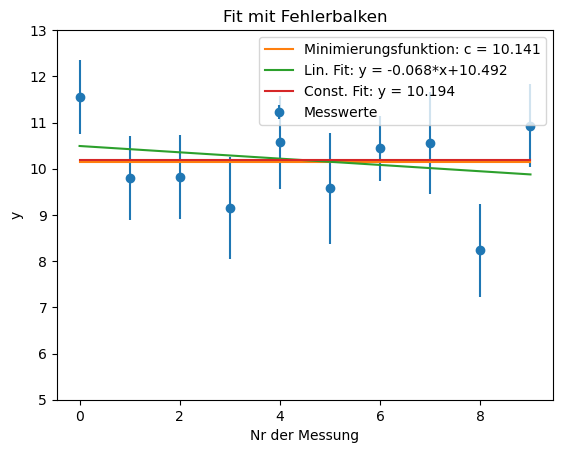

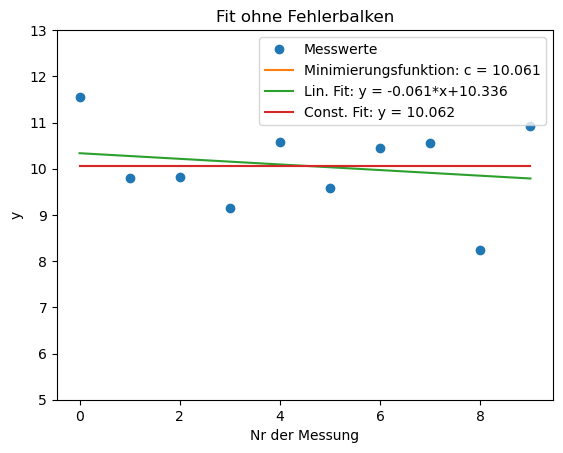

In [37]:
# ----- Mit Fehlerbalken: ---- #

fit_lin_out_err = optimization.curve_fit(fit_lin, x, y, sigma=s_y)
fit_const_out_err = optimization.curve_fit(fit_const, x, y, sigma=s_y)

plt.errorbar(x,y, fmt='o', xerr = None, yerr = s_y, label = 'Messwerte')
plt.plot(x,f(x,  c_val[id_min_S]), label = 'Minimierungsfunktion: c = %5.3f'%(c_val[id_min_S]))
plt.plot(x,fit_lin(x, fit_lin_out_err[0][0], fit_lin_out_err[0][1]), label = 'Lin. Fit: y = %5.3f*x+%5.3f'%(fit_lin_out_err[0][0], fit_lin_out_err[0][1]))
plt.plot(x,fit_const(x, fit_const_out_err[0][0]), label = 'Const. Fit: y = %5.3f'%(fit_const_out_err[0][0]))
plt.xlabel('Nr der Messung')
plt.ylabel('y')
plt.ylim([5,13])
plt.legend()
plt.title('Fit mit Fehlerbalken')
plt.show()


# ----- Ohne Fehlerbalken: ---- #

fit_lin_out = optimization.curve_fit(fit_lin, x, y)
fit_const_out = optimization.curve_fit(fit_const, x, y)

plt.plot(x,y, 'o', label = 'Messwerte')
plt.plot(x,f(x,  c_val[id_min_Q]), label = 'Minimierungsfunktion: c = %5.3f'%(c_val[id_min_Q]))
plt.plot(x,fit_lin(x, fit_lin_out[0][0], fit_lin_out[0][1]), label = 'Lin. Fit: y = %5.3f*x+%5.3f'%(fit_lin_out[0][0], fit_lin_out[0][1]))
plt.plot(x,fit_const(x, fit_const_out[0][0]), label = 'Const. Fit: y = %5.3f'%(fit_const_out[0][0]))
plt.xlabel('Nr der Messung')
plt.ylabel('y')
plt.ylim([5,13])
plt.legend()
plt.title('Fit ohne Fehlerbalken')
plt.show()

###  Kurvenanpassung mit Python: lmfit <a id="SubSec-lmfit_bsp2"></a>

Das vorangegangene Beispiel mit scipy zeigt auf, wie aufwändig es ist eine Fitparameter zu fixieren. Es muss eine neue Funktion mit weniger Freiheitsgeraden definiert werden. Wie oben schon angeükndigt, lässt sich dies mit dem lmfit-Paket etwas einfacher lösen und soll hier anhand des Beispiels noch einmal visualisiert werden. 

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
abschnitt     10.49     -inf      inf   0.5446     True     None     None
steigung   -0.06839     -inf      inf   0.1031     True     None     None
[[Model]]
    Model(f_lin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 10
    # variables        = 2
    chi-square         = 8.81129304
    reduced chi-square = 1.10141163
    Akaike info crit   = 2.73449106
    Bayesian info crit = 3.33966124
[[Variables]]
    steigung:  -0.06839389 +/- 0.10313985 (150.80%) (init = 0)
    abschnitt:  10.4919542 +/- 0.54460553 (5.19%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(steigung, abschnitt) = -0.825


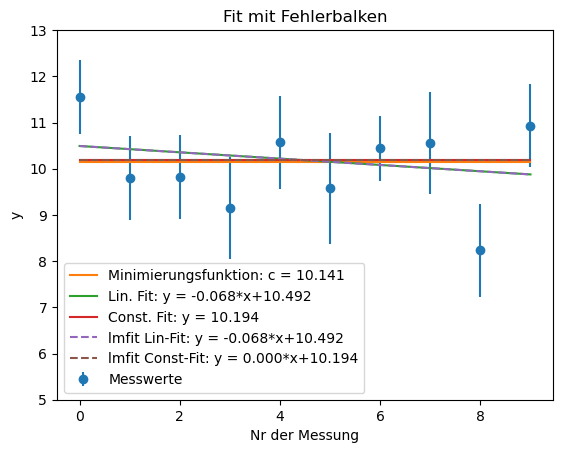

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
abschnitt     10.34     -inf      inf   0.5822     True     None     None
steigung   -0.06085     -inf      inf   0.1091     True     None     None
[[Model]]
    Model(f_lin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 10
    # variables        = 2
    chi-square         = 7.84870061
    reduced chi-square = 0.98108758
    Akaike info crit   = 1.57762897
    Bayesian info crit = 2.18279916
[[Variables]]
    steigung:  -0.06084848 +/- 0.10905032 (179.22%) (init = 0)
    abschnitt:  10.3358182 +/- 0.58216937 (5.63%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(steigung, abschnitt) = -0.843
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
abschnitt     10.06     -inf      inf    0.301     True     None     None
steigung          0     -inf      inf        0    False     None     None
[[Model]]
    Mod

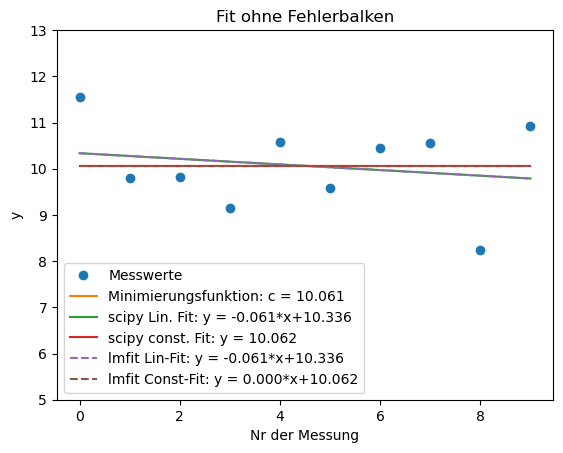

In [38]:
# ----- Mit Fehlerbalken: ---- #

def f_lin(x, steigung, abschnitt):
    return steigung*x + abschnitt

model = Model(f_lin)
params = model.make_params(steigung=0.0, abschnitt=10.0)
result_lin = model.fit(y, params, x=x, weights = 1/s_y) # Fehlerbalken werden über die 'weights = 1/sigma' Option berücksichtigt

params['steigung'].set(0.0, vary=False)
result_const = model.fit(y, params, x=x, weights = 1/s_y)

#print('Fit Parameter der Linearen Regression:')
result_lin.params.pretty_print()
#print('Fit Report:')
print(result_lin.fit_report())

#print('Fit Parameter der Konstanten Regression:')
#result_const.params.pretty_print()
#print('Fit Report:')
#print(result_const.fit_report())

plt.errorbar(x,y, fmt='o', xerr = None, yerr = s_y, label = 'Messwerte')
plt.plot(x,f(x,  c_val[id_min_S]), label = 'Minimierungsfunktion: c = %5.3f'%(c_val[id_min_S]))
plt.plot(x,fit_lin(x, fit_lin_out_err[0][0], fit_lin_out_err[0][1]), label = 'Lin. Fit: y = %5.3f*x+%5.3f'%(fit_lin_out_err[0][0], fit_lin_out_err[0][1]))
plt.plot(x,fit_const(x, fit_const_out_err[0][0]), label = 'Const. Fit: y = %5.3f'%(fit_const_out_err[0][0]))
plt.plot(x,result_lin.best_fit, '--',label = 'lmfit Lin-Fit: y = %5.3f*x+%5.3f' %(result_lin.params['steigung'].value,result_lin.params['abschnitt'].value))  # plot Fitfunktion mit b und a
plt.plot(x,result_const.best_fit, '--',label = 'lmfit Const-Fit: y = %5.3f*x+%5.3f' %(result_const.params['steigung'].value,result_const.params['abschnitt'].value))  # plot Fitfunktion mit b und a
plt.xlabel('Nr der Messung')
plt.ylabel('y')
plt.ylim([5,13])
plt.legend()
plt.title('Fit mit Fehlerbalken')
plt.show()


# ----- Ohne Fehlerbalken: ---- #

def f_lin(x, steigung, abschnitt):
    return steigung*x + abschnitt

model = Model(f_lin)
params = model.make_params(steigung=0.0, abschnitt=10.0)
result_lin = model.fit(y, params, x=x)

params['steigung'].set(0.0, vary=False)
result_const = model.fit(y, params, x=x)

#print('Fit Parameter der Linearen Regression:')
result_lin.params.pretty_print()
#print('Fit Report:')
print(result_lin.fit_report())

#print('Fit Parameter der Konstanten Regression:')
result_const.params.pretty_print()
#print('Fit Report:')
print(result_const.fit_report())

plt.plot(x,y, 'o', label = 'Messwerte')
plt.plot(x,f(x,  c_val[id_min_Q]), label = 'Minimierungsfunktion: c = %5.3f'%(c_val[id_min_Q]))
plt.plot(x,fit_lin(x, fit_lin_out[0][0], fit_lin_out[0][1]), label = 'scipy Lin. Fit: y = %5.3f*x+%5.3f'%(fit_lin_out[0][0], fit_lin_out[0][1]))
plt.plot(x,fit_const(x, fit_const_out[0][0]), label = 'scipy const. Fit: y = %5.3f'%(fit_const_out[0][0]))
plt.plot(x,result_lin.best_fit, '--',label = 'lmfit Lin-Fit: y = %5.3f*x+%5.3f' %(result_lin.params['steigung'].value,result_lin.params['abschnitt'].value))  # plot Fitfunktion mit b und a
plt.plot(x,result_const.best_fit, '--',label = 'lmfit Const-Fit: y = %5.3f*x+%5.3f' %(result_const.params['steigung'].value,result_const.params['abschnitt'].value))  # plot Fitfunktion mit b und a
plt.xlabel('Nr der Messung')
plt.ylabel('y')
plt.ylim([5,13])
plt.legend()
plt.title('Fit ohne Fehlerbalken')
plt.show()

## Zusammenfassung <a id="Sec-Zusammenfassung"></a>

![Bild](pictures/zusammenfassung_4.png)